## KNN Class Recommender 
A notebook of the general recommender 

In [4]:
import pandas as pd
import numpy as np 
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import truncatedSVD


ImportError: cannot import name 'truncatedSVD'

# Importing the CSVs generated from our scrappers and filtered
We read the CSVs we created based on our scraping codes., then we show small parts of it and its general information.

In [17]:
classes=pd.read_csv('/Users/nadiam/Desktop/Final_Project/CSV/class_info.csv', sep=',', error_bad_lines= False)
classes.head()

#This information comes from the scraping codes I have in my repo,
# The rest of the datasets are mock data sets I made for testing. 


,class_id,class_code,class_title,type,year,link
0,1,E1008,INTRO TO MACHINING,1,1,http://www.columbia.edu/cu/bulletin/uwb/subj/M...
1,2,E3028,MECHANICAL ENGINEERING LAB II,8,3,http://www.columbia.edu/cu/bulletin/uwb/subj/M...
2,3,E3105,MECHANICS,1,2,http://www.columbia.edu/cu/bulletin/uwb/subj/E...
3,4,E3311,HEAT TRANSFER,7,3,http://www.columbia.edu/cu/bulletin/uwb/subj/M...
4,5,E3408,COMPUTER GRAPHICS &amp; DESIGN,1,2,http://www.columbia.edu/cu/bulletin/uwb/subj/M...


In [16]:
classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
class_id       41 non-null int64
class_code     41 non-null object
class_title    41 non-null object
type           41 non-null int64
year           41 non-null int64
link           41 non-null object
dtypes: int64(3), object(3)
memory usage: 2.0+ KB


In [6]:
ratings=pd.read_csv('/Users/nadiam/Desktop/Final_Project/CSV/userrating_info.csv')
ratings.head()

,user_id,class_id,rating
0,1,17,5
1,2,1,2
2,3,40,4
3,4,34,1
4,5,31,3


In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
user_id     1000 non-null int64
class_id    1000 non-null int64
rating      1000 non-null int64
dtypes: int64(3)
memory usage: 23.5 KB


In [7]:
users=pd.read_csv('/Users/nadiam/Desktop/Final_Project/CSV/user_info.csv', sep=',', error_bad_lines= False)
users.head()

,user_id,year_id,type
0,1,2,5
1,2,3,1
2,3,3,5
3,4,1,6
4,5,1,4


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
user_id    1000 non-null int64
year_id    1000 non-null int64
type       1000 non-null int64
dtypes: int64(3)
memory usage: 23.5 KB


### We then combine the Class data and the ratings data in order to create a dataset that contains our necessary features for our future matrices.

In [8]:
combined_class_rating = pd.merge(ratings,classes, on="class_id") #we combine the two DF on the class id which is joint 
#between the two dfs.
combined_class_rating.head()

,user_id,class_id,rating,class_code,class_title,type,year,link
0,1,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...
1,8,17,2,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...
2,20,17,2,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...
3,66,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...
4,130,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...


# Exploring the data

In [39]:
# number of ratings in our mock dataset
df_ratings_cnt = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt

,count
rating,
1,170
2,210
3,212
4,210
5,198


In [10]:
#we add a column to our dataset that has the toal number of ratings for each class then arranges them in order.
rating_total=combined_class_rating.merge(class_ratingcount, left_on='class_title', right_on="class_title")
rating_total.head()

,user_id,class_id,rating,class_code,class_title,type,year,link,totalrating
0,1,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31
1,8,17,2,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31
2,20,17,2,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31
3,66,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31
4,130,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31


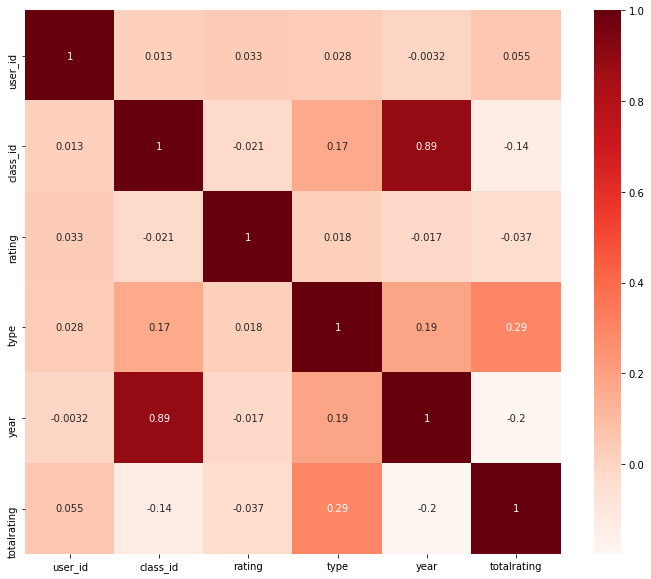

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation between rating, and class
plt.figure(figsize=(12,10))
cor = rating_total.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Problems with this correlation
Considering that the data used here is mock data, we can't really rely on these coorelations. However, some expected correlations may be type/rating as people are more likely to positively rate classes that are the right type for them. 
Another expected correlation may be type/year as more classes become more specialized as students progress. 

## Some statistics for the class ratings in our mock data set

In [9]:
# We make a new table for our classes with their total ratings 
class_ratingcount=(combined_class_rating
                   .groupby(by=['class_title'])['rating'].
                    count().reset_index().
                    rename(columns={'rating':'totalrating'})
                    [['class_title','totalrating']]
                           )
class_ratingcount.head()

,class_title,totalrating
0,ADVANCED HEAT TRANSFER,22
1,ADVANCED MACHINE DYNAMICS,22
2,ADVANCED THERMODYNAMICS,31
3,APPLIED SIGNAL RECOGNITION,23
4,"Advanced Kinematics, Dynamics, and Contr",27


In [11]:
print(class_ratingcount['totalrating'].describe()) #some stats things

count    40.000000
mean     25.000000
std       6.271629
min      15.000000
25%      22.000000
50%      24.500000
75%      28.250000
max      45.000000
Name: totalrating, dtype: float64


In [12]:
print(class_ratingcount['totalrating'].quantile(np.arange(.9,1,0.01)))
#We arrange the number of ratings in percentiles to isolate the more popular classes

0.90    32.10
0.91    32.49
0.92    32.88
0.93    33.27
0.94    33.66
0.95    34.05
0.96    34.44
0.97    34.83
0.98    37.20
0.99    41.10
Name: totalrating, dtype: float64


In [13]:
popularity_threshold= 25 # I set this because it was the average number of ratings but looking back at it now, maybe we should aim higher?
rating_popularclass= rating_total.query('totalrating >= @popularity_threshold')
rating_popularclass.head()

,user_id,class_id,rating,class_code,class_title,type,year,link,totalrating
0,1,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31
1,8,17,2,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31
2,20,17,2,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31
3,66,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31
4,130,17,5,E4302,ADVANCED THERMODYNAMICS,2,4,http://www.columbia.edu/cu/bulletin/uwb/subj/M...,31


Now we need to construct the KNN by transforming our df to a matrix. 

In [56]:
from scipy.sparse import csr_matrix

#Transform the DF into a matrix 
pivot=rating_total.pivot(index="class_title",columns="user_id", values="rating").fillna(0)

# convert dataframe of movie features to scipy sparse matrix
mat_class_features = csr_matrix(pivot.values)

pivot.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
class_title,,,,,,,,,,,,,,,,,,,,,
ADVANCED HEAT TRANSFER,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADVANCED MACHINE DYNAMICS,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADVANCED THERMODYNAMICS,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APPLIED SIGNAL RECOGNITION,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Advanced Kinematics, Dynamics, and Contr",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(mat_class_features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=-1, n_neighbors=20, p=2, radius=1.0)

In [60]:
query_index=np.random.choice(pivot.shape[0])
distances, indices =model_knn.kneighbors(pivot.iloc[query_index,:].reshape(1,-1), n_neighbors=6)

for i in range(0,len(distances.flatten())):
    if i == 0:
        print("If you liked {0}, you'll like:\n".format(pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivot.index[indices.flatten()[i]], distances.flatten()[i]))

/Users/nadiam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


If you liked NANOSCALE ACTUATION &amp; SENSING, you'll like:

1: MATERIALS/PROCESSES IN MANUFAC, with distance of 1.0:
2: MECHANICAL ENGINEERING LAB II, with distance of 1.0:
3: MECH &amp; THERMODYNAMICS OF PROPULSION, with distance of 1.0:
4: MECHANICS OF FLUIDS, with distance of 1.0:
5: MASTERS THESIS, with distance of 1.0:


# I need to solve this euclidean distance inaccuracy.

This issue with the euclidean distance may have something to do with further tuning the KNN. This will be something I'll continue working on.

It also may be a result of the small distances between the datapoints in the mock data. 

### References:
1. Li, Susan. 2017. “How Did We Build Book Recommender Systems in An Hour Part 2 — k NearestNeighbors and Matrix....”. Library Catalog: towardsdatascience.com.URL:https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-part-2-k-nearest-neighbors-and-matrix-c04b3c2ef55c
2. Liao, Kevin. 2018. “Prototyping a Recommender System Step by Step Part 1: KNN Item-Based Col-laborative Filtering.”. Library Catalog: towardsdatascience.com.URL:https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea
3. Dan. N.d.  “Web scraping using Python and BeautifulSoup | Codementor.”.  Library Catalog:www.codementor.io.URL:https://www.codementor.io/@dankhan/web-scrapping-using-python-and-beautifulsoup-o3hxadit4
